In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.decomposition import PCA
from numpy import linalg as LA
import numpy as np
warnings.filterwarnings("ignore")

In [2]:
data = np.load(f'file.npz')

In [3]:
print(data['tokens'])
print("The number of tokens in the test data is:")
print(len(data['tokens'].tolist()))

!!""##$$%%&&''(())**++,,--..//00112233445566778899::;;<<==>>??@@AABBCCyy55PP__HHIIJJKKCCMMaaOOPPQQ33SS55__VVWWXXYYZZ[[\\]]^^__``aabbccddeeffgghhiijjkkllmmnnooppqqrrssttuuvvwwxxyyzz11||}}~~
The number of tokens in the test data is:
188


In [4]:
print(data['embeddings'])
print("The shape of the embeddings in the data is:")
print(data['embeddings'].shape)

[[-0.05626911  0.01941425  0.06640906 ... -0.00805354 -0.0979707
   0.02474891]
 [-0.02409083  0.00764982  0.02582571 ... -0.00462916 -0.03917944
   0.01424763]
 [-0.02501099  0.00751202  0.02511948 ... -0.00557303 -0.03888004
   0.01716333]
 ...
 [-0.00038671 -0.01712508 -0.06748112 ... -0.0308428   0.07140732
   0.09535483]
 [ 0.00105846 -0.00885126 -0.0346543  ... -0.0149868   0.03728517
   0.0463371 ]
 [ 0.00464299 -0.01835814 -0.07143986 ... -0.02922684  0.07806666
   0.09037224]]
The shape of the embeddings in the data is:
(188, 512)


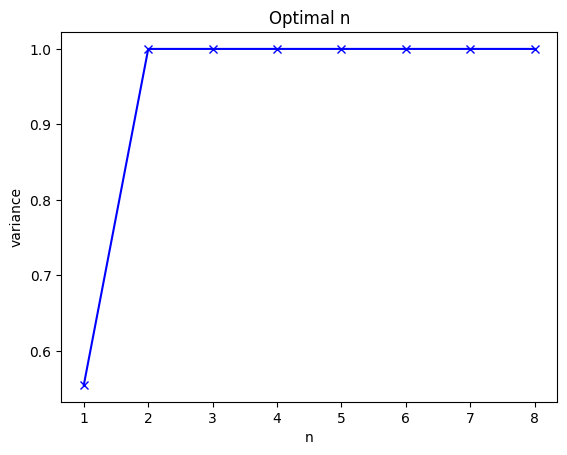

In [5]:
variances = []
N = range(1,9)
for n in N:
    pca = PCA(n_components=n)
    pca.fit(data['embeddings'])

    variances.append(np.sum(pca.explained_variance_ratio_))

plt.plot(N, variances, 'bx-')
plt.xlabel('n')
plt.ylabel('variance')
plt.title(f'Optimal n')
plt.show()

(188, 2)


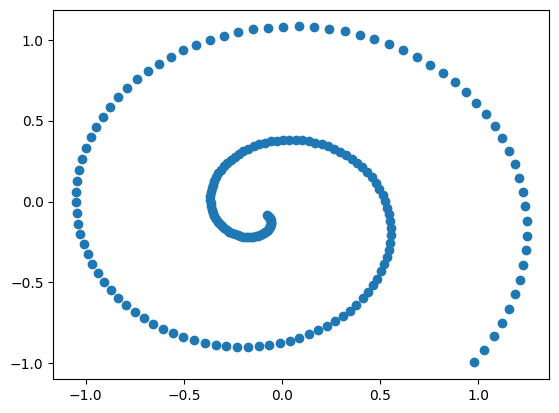

In [6]:
pca = PCA(n_components=2)
emb_reduced = pca.fit_transform(data['embeddings'])
print(emb_reduced.shape)
plt.scatter(emb_reduced[:,0], emb_reduced[:,1])

In [7]:
list_tokens = data['tokens'].tolist()
#calculating the distance of each point from the origin
dist = np.linalg.norm(emb_reduced,axis=-1)
flag_string = ""
#sorting the distances and getting the corresponding token
for idx in np.argsort(dist):
    flag_string += list_tokens[idx]
    
print(flag_string)

PCA_15_3a5y}0123456789abcdefghijklmnopqrstuvwxIHyJCBzKMOPQSVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`|~0123456789abcdefghijklmnopqrstuvwxyzABCy5P_HIJKCMaOPQ3S5_VWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`1|}~
